In [1]:
import bilby
import pandas as pd
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot

mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34','ana_plus_phe_mrms_174']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$',r'$\rm{ANA+PHE}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########

main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'

evidence_data={}
for j in [0,1,2,7]:
    evidence_data['evi_'+str(mrms_data_label[j])]=\
    pd.read_csv(main_direct + '{}/{}_evidence.csv'.format(mrms_data_label[j],mrms_data_label[j]) , index_col=None, header=None)

In [2]:
bf_m_2g={}
for j in [0,1,2,7]:
    bf_tem=evidence_data['evi_'+str(mrms_data_label[j])][1][[0,4,8,7,10]]\
    -evidence_data['evi_'+str(mrms_data_label[j])][1][11]
    bf_m_2g['bf_'+str(mrms_data_label[j])] = bf_tem

Text(0, 0.5, '$\\rm{BF^{M}_{2G}}$')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


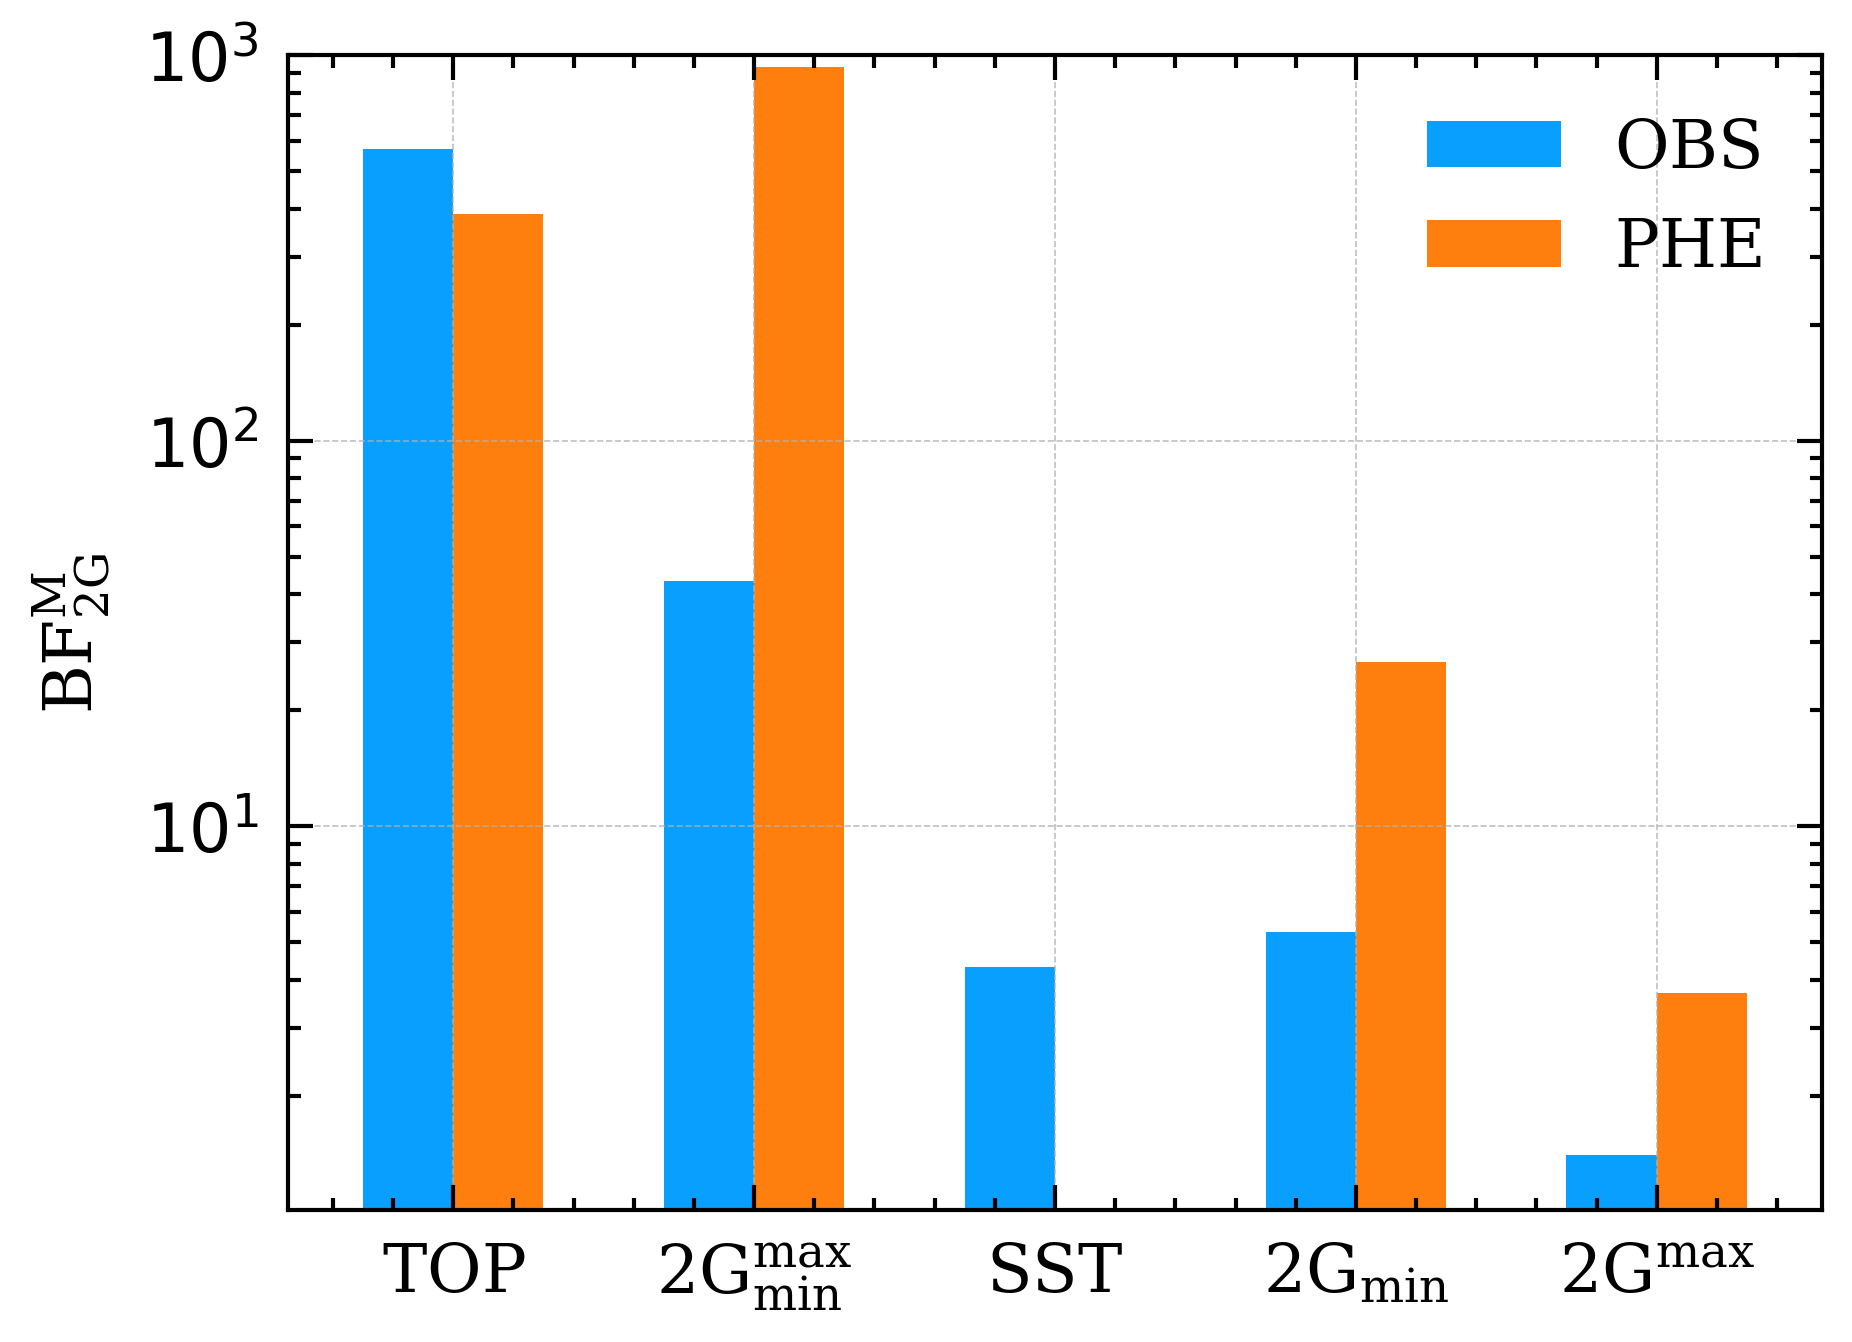

In [13]:

import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
#plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

a=0
b=1
c=7
index=[r'$\rm{TOP}$', r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame( {r'$\rm{OBS}$': np.exp((bf_m_2g['bf_'+str(mrms_data_label[a])]).values), 
                   #r'$\rm{ANA}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[b])]).values),  
                   r'$\rm{PHE}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[c])]).values)},
                   index=index)

ax = df1.plot.bar(width=0.6,color= [ '#089FFF','#ff7f0e','grey'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
#ax.get_legend().remove()
plt.ylim(1.01,1*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
#plt.savefig('bf_m_nopow_2g_obs_phe.jpg')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


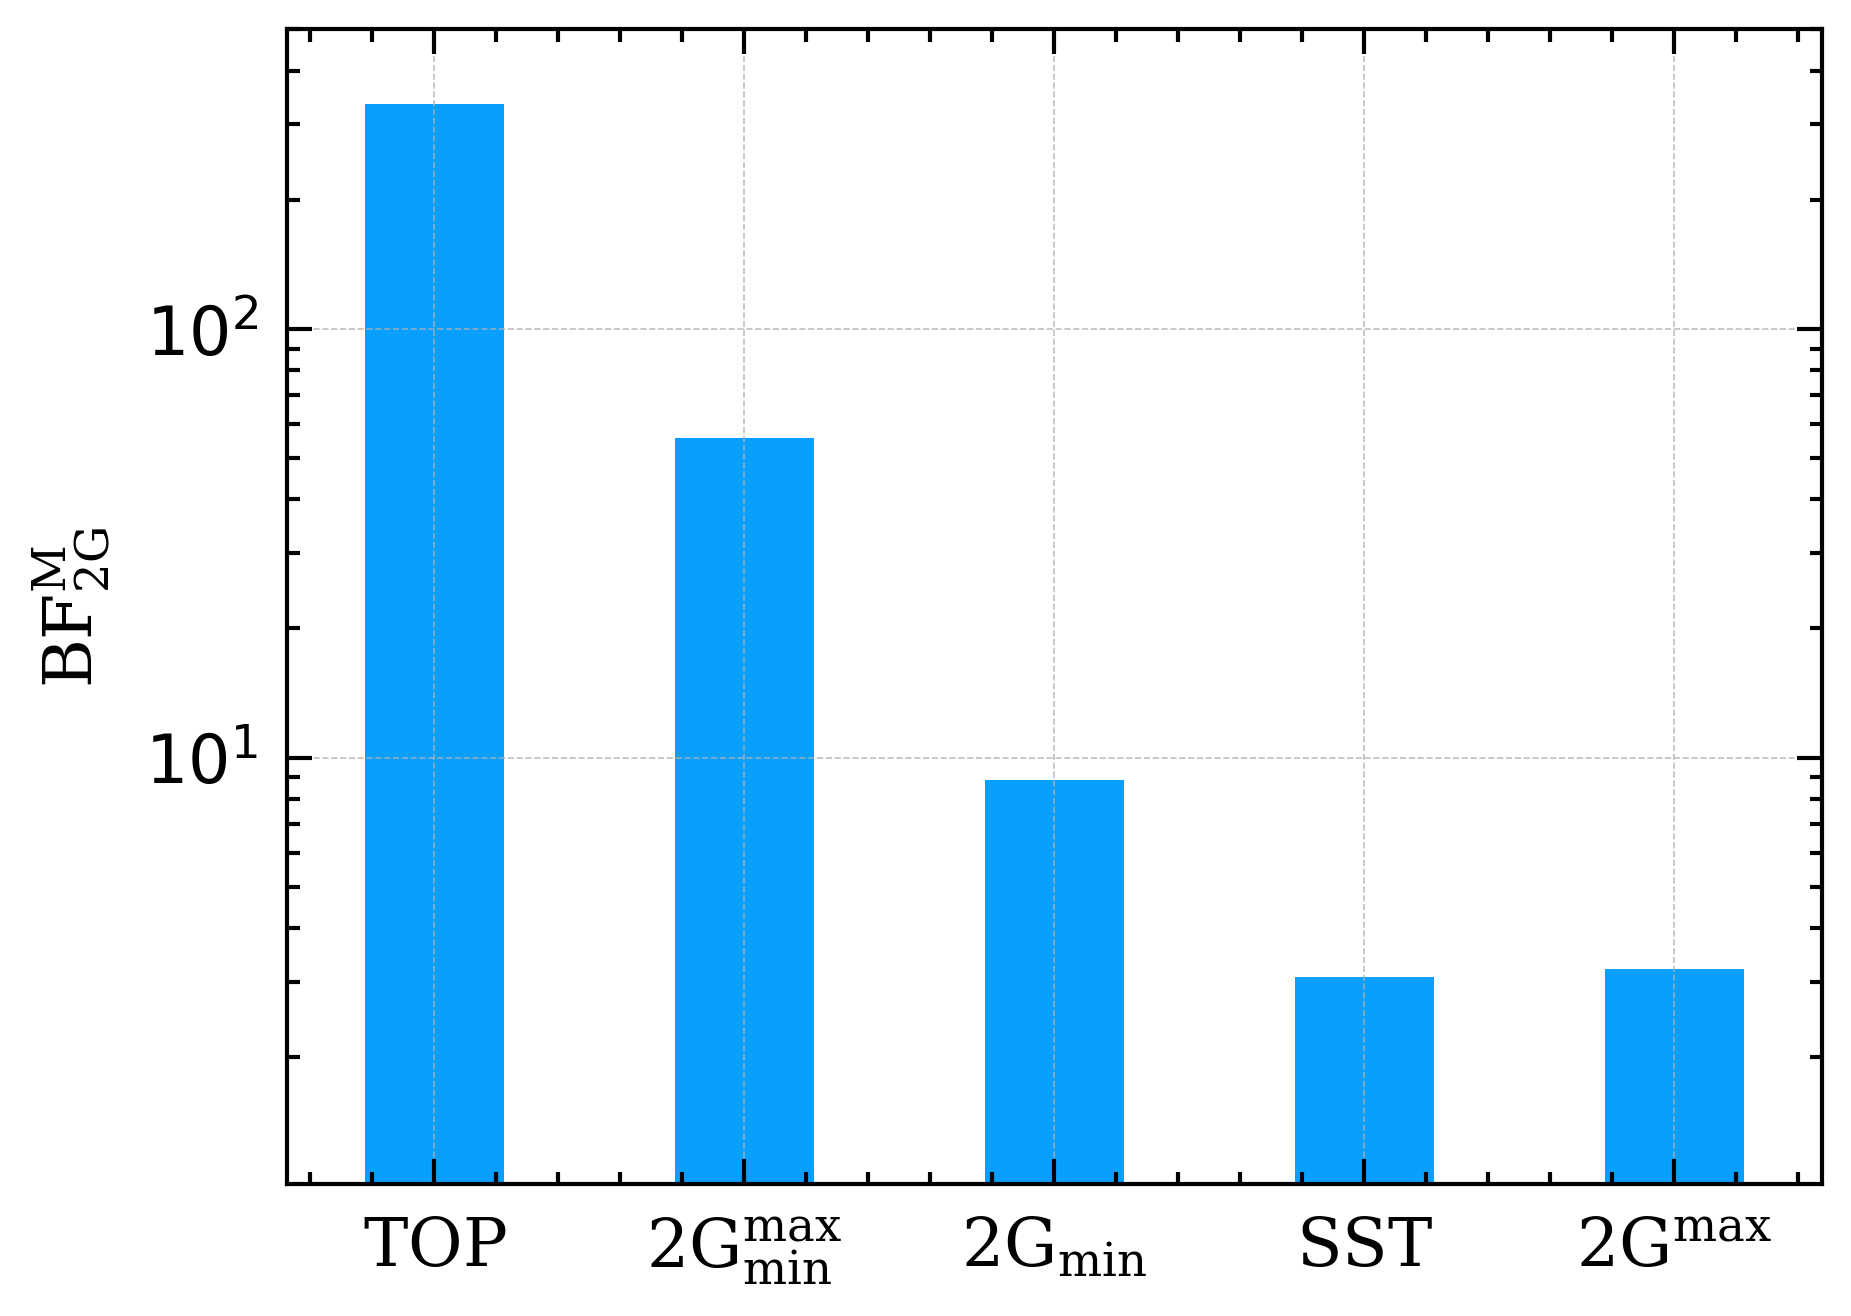

In [15]:
import pandas as pd
import numpy as np
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
#plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

a=0
b=1
c=2
index=[r'$\rm{TOP}$',  r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame( {#r'$\rm{OBS}$': np.exp((bf_m_2g['bf_'+str(mrms_data_label[a])]).values), 
                   r'$\rm{ANA}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[b])]).values)},  
                   #r'$\rm{PHE}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[c])]).values)},
                   index=index)
df11=df1.reindex([r'$\rm{TOP}$',  r'$\rm{2G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{2G^{max}}$'])
ax = df11.plot.bar(width=0.45,color= ['#089FFF','#ff7f0e','grey'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
ax.get_legend().remove()
plt.ylim(1.01,0.5*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
plt.savefig('bf_m_nopow_2g_ana.jpg')

$\rm{ANA}$  $\rm{PHE}$
$\rm{TOP}$             334.416481  688.208138
$\rm{2G^{max}_{min}}$   55.784715  212.250493
$\rm{2G_{min}}$          8.875049   16.571719
$\rm{SST}$               3.071381    7.316419
$\rm{2G^{max}}$          3.208990    5.783239

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


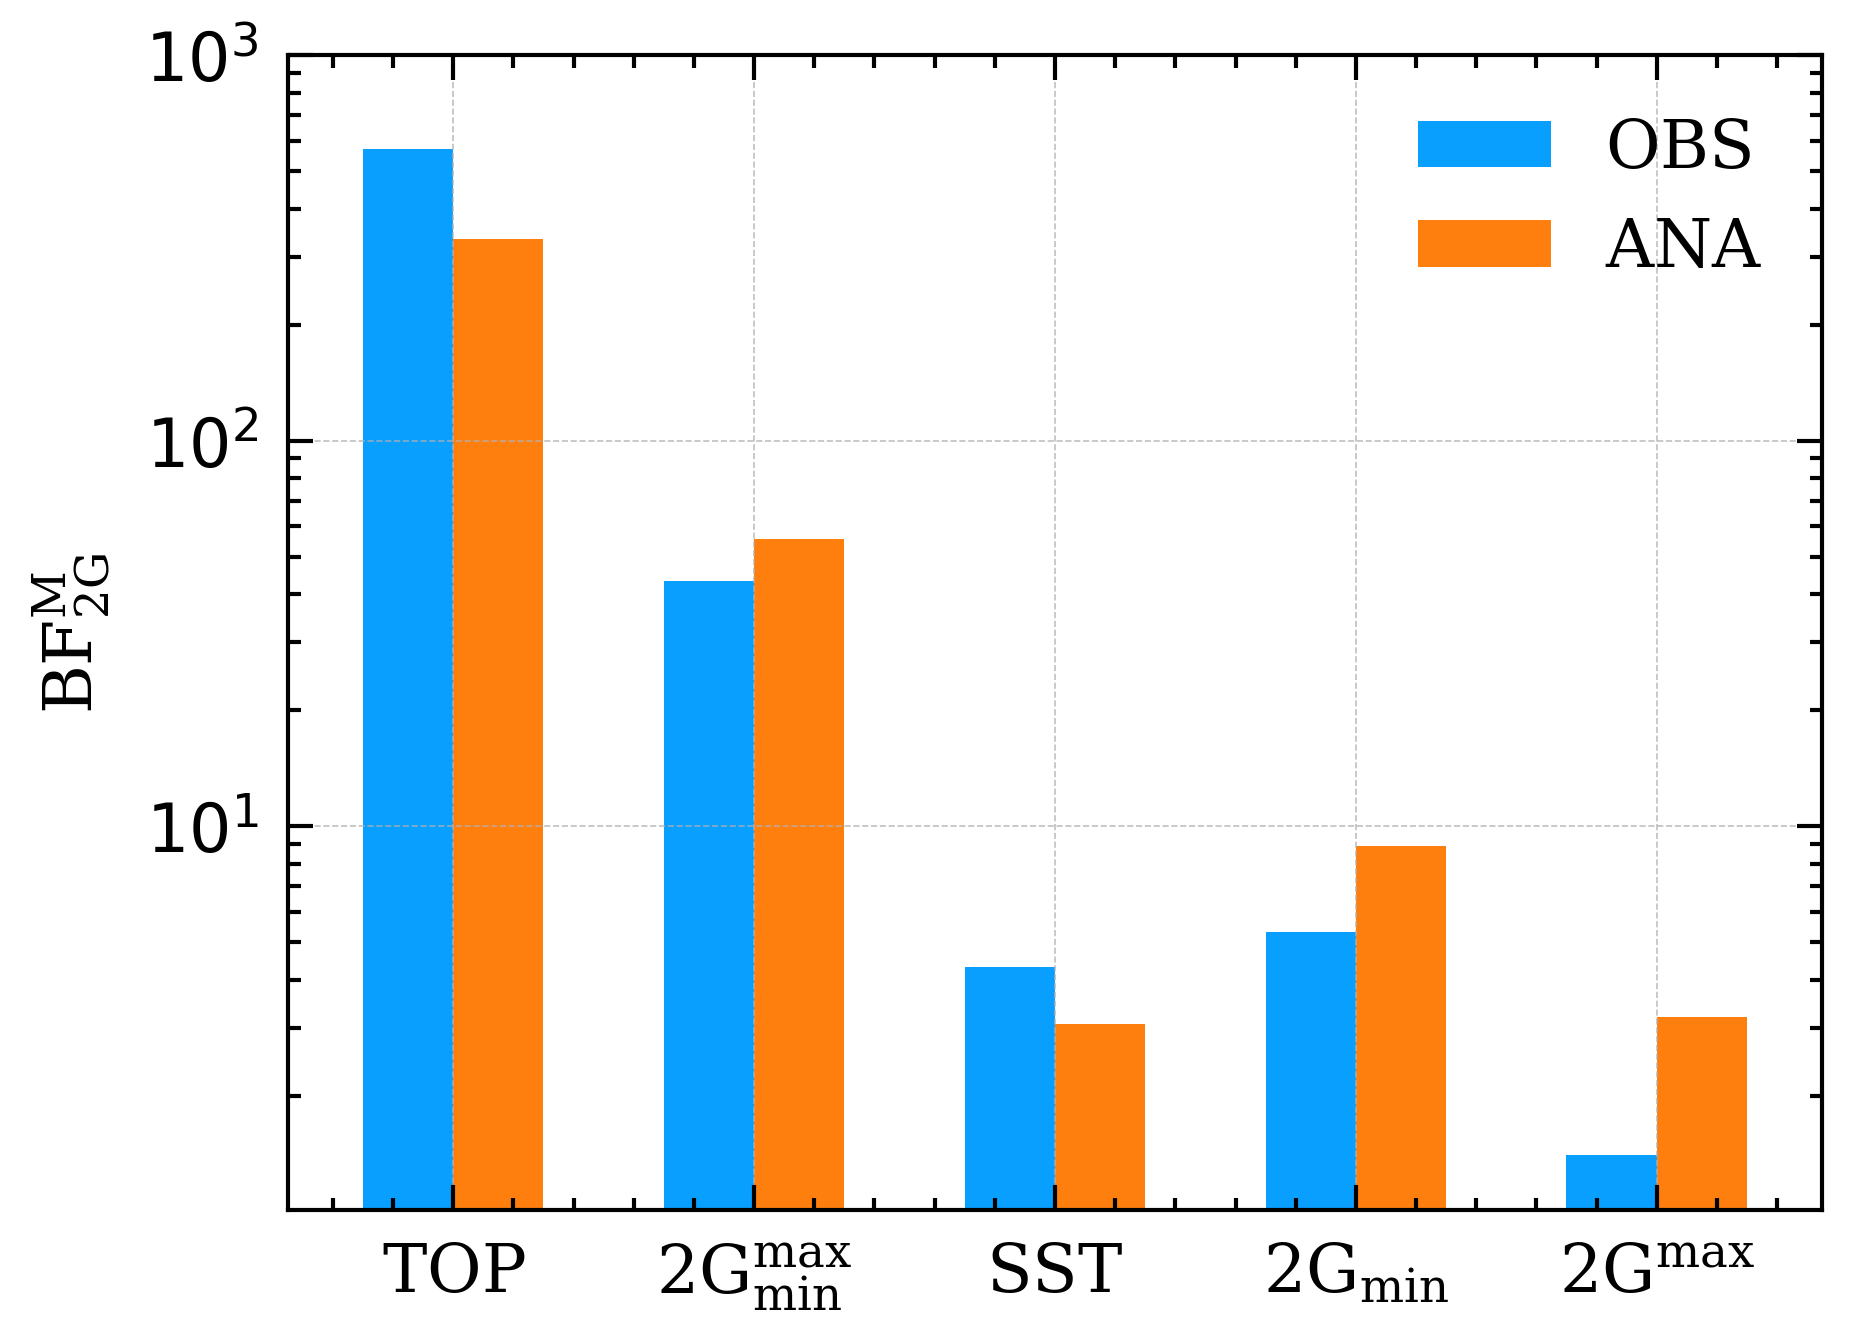

In [90]:
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
#plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

a=0
b=1
c=2
index=[r'$\rm{TOP}$', r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame( {r'$\rm{OBS}$': np.exp((bf_m_2g['bf_'+str(mrms_data_label[a])]).values), 
                   r'$\rm{ANA}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[b])]).values) },  
                   #r'$\rm{PHE}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[c])]).values)},
                   index=index)

ax = df1.plot.bar(width=0.6,color= [ '#089FFF','#ff7f0e','grey'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
#ax.get_legend().remove()
plt.ylim(1.01,1*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
plt.savefig('bf_m_nopow_2g_obs_ana.jpg')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


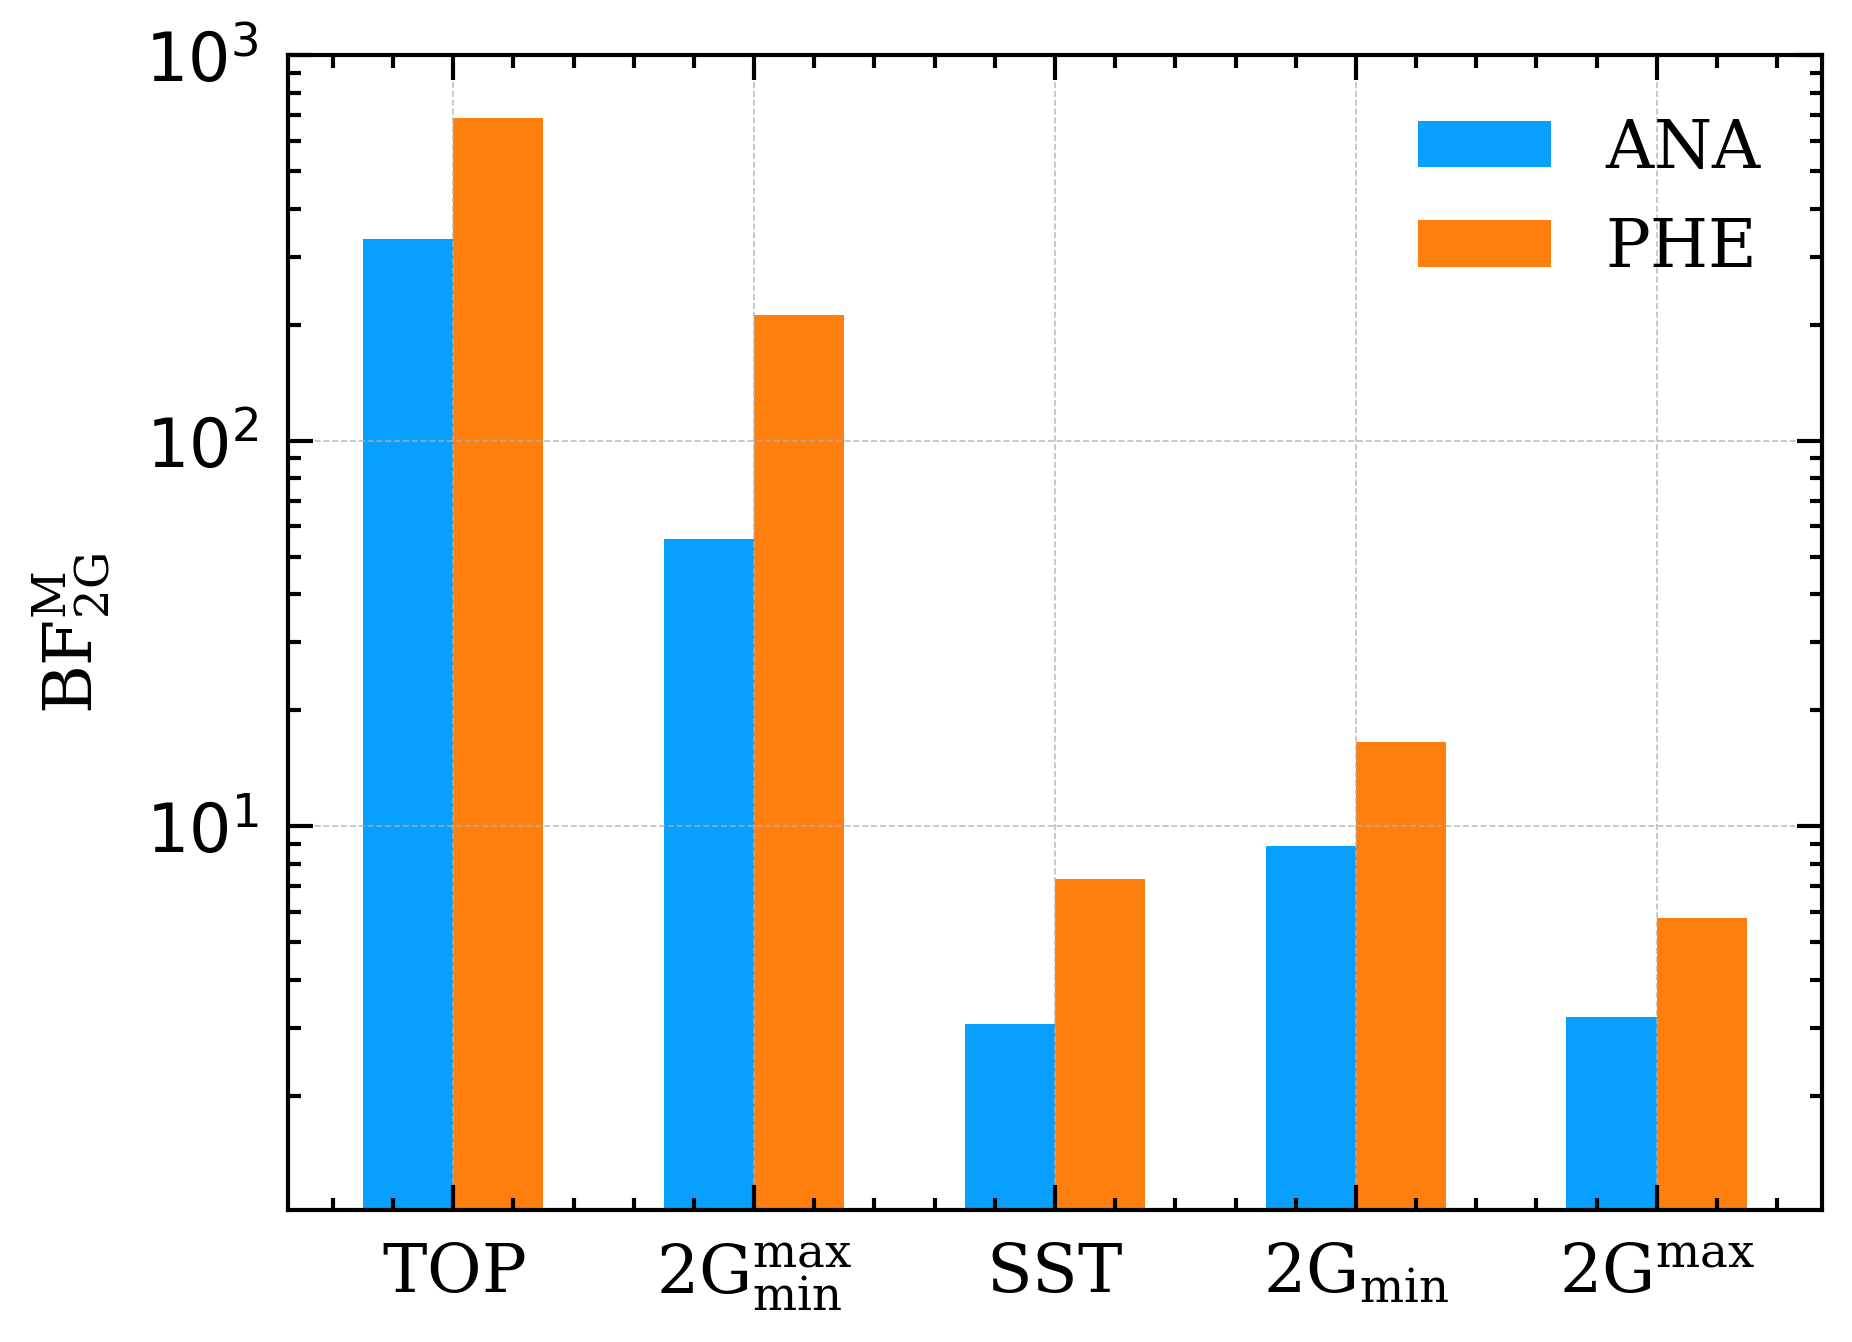

In [92]:
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
#plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

a=0
b=1
c=2
index=[r'$\rm{TOP}$', r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame( #{r'$\rm{OBS}$': np.exp((bf_m_2g['bf_'+str(mrms_data_label[a])]).values), 
                   {r'$\rm{ANA}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[b])]).values) ,  
                   r'$\rm{PHE}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[c])]).values)},
                   index=index)

ax = df1.plot.bar(width=0.6,color= [ '#089FFF','#ff7f0e','grey'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
#ax.get_legend().remove()
plt.ylim(1.01,1*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
plt.savefig('bf_m_nopow_2g_ana_phe.jpg')

In [175]:
import bilby
import pandas as pd
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot

mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34','ana_plus_phe_mrms_174']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$',r'$\rm{ANA+PHE}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########

main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'

evi_index=[0,1,2,3,4,5,6,7]
evis={}
for j in evi_index:
    evis['evi_'+str(mrms_data_label[j])]=\
    pd.read_csv(main_direct + '{}/{}_evidence.csv'.format(mrms_data_label[j],mrms_data_label[j]) , index_col=None, header=None)

In [178]:
bf_m_u={}
bf_m_u_array=np.zeros((16,8))
for j in evi_index:
    bf_tem=evis['evi_'+str(mrms_data_label[j])][1][[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]\
    -evis['evi_'+str(mrms_data_label[j])][1][16]
    bf_m_u['bf_'+str(mrms_data_label[j])] = bf_tem 
    bf_m_u_array[:,j]=bf_tem 

In [179]:
evis

{'evi_ns_obs':                           0          1
 0               turn_on_pow  58.610177
 1           turn_on_pow_fix  57.681697
 2             turn_on_pow_G  56.593369
 3                       pow  56.133104
 4                        2G  56.032573
 5   turn_on_pow_G_fixed_max  54.776201
 6                         G  53.931754
 7              2G_fixed_max  53.932685
 8                       sst  53.727280
 9               G_fixed_max  53.611682
 10             2G_fixed_min  52.602263
 11         2G_fixed_max_min  52.262297
 12                     logu  50.992797
 13         3G_fixed_max_min  51.036804
 14                  lognorm  47.295109
 15                    gamma  45.929501
 16                        U  45.448877
 17          G_fixed_max_min  41.547768,
 'evi_ana_corrected_mrms_87':                           0          1
 0               turn_on_pow  62.326233
 1           turn_on_pow_fix  61.694323
 2             turn_on_pow_G  60.645042
 3                       pow  61.621

In [180]:
pd.DataFrame(np.around(bf_m_u_array,decimals=1), index = (evis['evi_'+str(mrms_data_label[0])][0][0:16]).values, columns=data_name_labes)

$\rm{OBS}$  $\rm{ANA}$  $\rm{PHE}$  $\rm{ANA_{m_r}}$  \
turn_on_pow                    13.2        16.1        13.1               8.7   
turn_on_pow_fix                12.2        15.4        12.2               8.5   
turn_on_pow_G                  11.1        14.4        12.4               7.0   
pow                            10.7        15.4        14.2               9.7   
2G                             10.6        14.3        11.9               7.7   
turn_on_pow_G_fixed_max         9.3        12.3         9.2               4.9   
G                               8.5         9.9         7.5               4.2   
2G_fixed_max                    8.5        12.4         9.4               5.7   
sst                             8.3        11.4         8.5               5.1   
G_fixed_max                     8.2         9.6         7.1               4.0   
2G_fixed_min                    7.2        11.4         8.3               5.6   
2G_fixed_max_min                6.8        10.3         6.6               4.2   
logu                            5.5         6.0         5.1               3.5   
3G_fixed_max_min                5.6         9.5         5.9               3.8   
lognorm                         1.8         3.6         1.2               1.3   
gamma                           0.5         2.1        -0.4               0.6   

                         $\rm{PHE_{m_r}}$  $\rm{m_r}$  $\rm{m_s}$  \
turn_on_pow                           6.3         6.2         4.4   
turn_on_pow_fix                       5.4         5.1         4.5   
turn_on_pow_G                         5.1         4.0         2.4   
pow                                   7.2         6.9         3.8   
2G                                    5.2         4.2         1.7   
turn_on_pow_G_fixed_max               2.6         2.5         2.0   
G                                     2.8         2.5         1.2   
2G_fixed_max                          3.1         2.4         0.6   
sst                                   2.5         2.6         1.3   
G_fixed_max                           2.3         2.1         0.8   
2G_fixed_min                          2.6         0.4        -0.2   
2G_fixed_max_min                      1.1        -0.6        -1.3   
logu                                  3.1         3.2         1.4   
3G_fixed_max_min                      0.5        -1.0        -1.9   
lognorm                              -0.6        -1.7        -1.0   
gamma                                -1.1        -2.4        -1.4   

                         $\rm{ANA+PHE}$  
turn_on_pow                        32.1  
turn_on_pow_fix                    29.2  
turn_on_pow_G                      34.4  
pow                                32.8  
2G                                 33.0  
turn_on_pow_G_fixed_max            29.1  
G                                  22.1  
2G_fixed_max                       29.4  
sst                                25.0  
G_fixed_max                        22.1  
2G_fixed_min                       27.4  
2G_fixed_max_min                   26.1  
logu                               11.7  
3G_fixed_max_min                   25.2  
lognorm                             7.3  
gamma                               4.3

In [181]:
latex_table_model_name_label=[r'$\rm{TOP^{max}_{min}}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG^{max}_{min}}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',
                  r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',
                  r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{logU}$',r'$\rm{3G}$',r'$\rm{logN}$',r'$\rm{Gamma}$']
latex_data_name_labes=[r'$\rm{Models}$',data_name_labes[0:8]]
latex_data_name_labes = [r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$',r'$\rm{ANA+PHE}$']
pd.DataFrame(np.around(bf_m_u_array,decimals=1), index = latex_table_model_name_label , columns=latex_data_name_labes )

$\rm{OBS}$  $\rm{ANA}$  $\rm{PHE}$  $\rm{ANA_{m_r}}$  \
$\rm{TOP^{max}_{min}}$         13.2        16.1        13.1               8.7   
$\rm{TOP_{min}}$               12.2        15.4        12.2               8.5   
$\rm{TOPG^{max}_{min}}$        11.1        14.4        12.4               7.0   
$\rm{POW}$                     10.7        15.4        14.2               9.7   
$\rm{2G^{max}_{min}}$          10.6        14.3        11.9               7.7   
$\rm{TOPG_{min}}$               9.3        12.3         9.2               4.9   
$\rm{G^{max}_{min}}$            8.5         9.9         7.5               4.2   
$\rm{2G_{min}}$                 8.5        12.4         9.4               5.7   
$\rm{SST}$                      8.3        11.4         8.5               5.1   
$\rm{G_{min}}$                  8.2         9.6         7.1               4.0   
$\rm{2G_{max}}$                 7.2        11.4         8.3               5.6   
$\rm{2G}$                       6.8        10.3         6.6               4.2   
$\rm{logU}$                     5.5         6.0         5.1               3.5   
$\rm{3G}$                       5.6         9.5         5.9               3.8   
$\rm{logN}$                     1.8         3.6         1.2               1.3   
$\rm{Gamma}$                    0.5         2.1        -0.4               0.6   

                         $\rm{PHE_{m_r}}$  $\rm{m_r}$  $\rm{m_s}$  \
$\rm{TOP^{max}_{min}}$                6.3         6.2         4.4   
$\rm{TOP_{min}}$                      5.4         5.1         4.5   
$\rm{TOPG^{max}_{min}}$               5.1         4.0         2.4   
$\rm{POW}$                            7.2         6.9         3.8   
$\rm{2G^{max}_{min}}$                 5.2         4.2         1.7   
$\rm{TOPG_{min}}$                     2.6         2.5         2.0   
$\rm{G^{max}_{min}}$                  2.8         2.5         1.2   
$\rm{2G_{min}}$                       3.1         2.4         0.6   
$\rm{SST}$                            2.5         2.6         1.3   
$\rm{G_{min}}$                        2.3         2.1         0.8   
$\rm{2G_{max}}$                       2.6         0.4        -0.2   
$\rm{2G}$                             1.1        -0.6        -1.3   
$\rm{logU}$                           3.1         3.2         1.4   
$\rm{3G}$                             0.5        -1.0        -1.9   
$\rm{logN}$                          -0.6        -1.7        -1.0   
$\rm{Gamma}$                         -1.1        -2.4        -1.4   

                         $\rm{ANA+PHE}$  
$\rm{TOP^{max}_{min}}$             32.1  
$\rm{TOP_{min}}$                   29.2  
$\rm{TOPG^{max}_{min}}$            34.4  
$\rm{POW}$                         32.8  
$\rm{2G^{max}_{min}}$              33.0  
$\rm{TOPG_{min}}$                  29.1  
$\rm{G^{max}_{min}}$               22.1  
$\rm{2G_{min}}$                    29.4  
$\rm{SST}$                         25.0  
$\rm{G_{min}}$                     22.1  
$\rm{2G_{max}}$                    27.4  
$\rm{2G}$                          26.1  
$\rm{logU}$                        11.7  
$\rm{3G}$                          25.2  
$\rm{logN}$                         7.3  
$\rm{Gamma}$                        4.3

In [193]:
#alpha mmin mmax lam mu_g sigma_g delta_m
pos_top_G_plus=np.loadtxt('/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/ana_plus_phe_mrms_174/turn_on_pow_G/hy_outdir/u_hype_80288_samples.dat')

In [194]:
pos_top_G_plus

array([[1.22821425e+01, 1.14469191e+00, 2.15935626e+00, ...,
        2.86160061e+00, 4.82342477e-01, 1.68172480e-01],
       [1.16885918e+01, 1.00487564e+00, 2.11913274e+00, ...,
        2.20306977e+00, 7.58806942e-01, 5.46869731e-01],
       [7.43781698e+00, 1.08732049e+00, 2.21962977e+00, ...,
        2.62707183e+00, 1.52702021e+00, 2.31814898e-01],
       ...,
       [1.99661874e+01, 1.03139334e+00, 1.96206368e+00, ...,
        2.03730068e+00, 1.00921848e-02, 9.37593741e-01],
       [2.16659499e+01, 1.03889947e+00, 1.96209299e+00, ...,
        2.03974217e+00, 1.01921616e-02, 8.96843595e-01],
       [2.01098077e+01, 1.03786921e+00, 1.96209193e+00, ...,
        2.03799485e+00, 1.00899851e-02, 8.29836620e-01]])

In [198]:
fig= corner.corner(pos_top_G_plus, 
                       bins=20,smooth=0.85,color='#0072c1', #blue_line
                       #labels=[r'$m_{\rm{alpha}}\,({\rm {M_{\odot}}} )  $',r'$ m_{\rm{\rm min}} \,({\rm {M_{\odot}}} ) $',r'$\alpha$'],
                       labels = ['alpha', 'mmin', 'mmax' ,'lam' ,'mu_g', 'sigma_g', 'delta_m'],
                       quantiles=[0.16, 0.5, 0.84],
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       #weights=get_normalisation_weight(len(ana_pos_sam), max_len),
                       plot_density=False, plot_datapoints=True, fill_contours=True,
                       label_kwargs=dict(fontsize=16),#range=ranges,
                       show_titles=0, title_kwargs={"fontsize": 16})

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


In [2]:
import pandas as pd
evi_radio=pd.read_csv('/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/ana_radio/ana_radio_evidence.csv' , index_col=None, header=None)

#### 

In [3]:
evi_radio

0          1
0               turn_on_pow  60.565383
1           turn_on_pow_fix  60.595600
2             turn_on_pow_G  58.157061
3                       pow  57.034583
4                        2G  56.210862
5   turn_on_pow_G_fixed_max  57.963615
6                         G  53.775606
7              2G_fixed_max  54.977543
8                       sst  55.607415
9               G_fixed_max  53.401728
10             2G_fixed_min  54.881380
11         2G_fixed_max_min  53.624469
12                     logu  43.360235
13         3G_fixed_max_min  52.788395
14                  lognorm  51.395633
15                    gamma  50.284831
16                        U  38.503560
17          G_fixed_max_min  46.676951

In [4]:
evi_radio[1][:]-evi_radio[1][16]

0     22.061823
1     22.092040
2     19.653501
3     18.531023
4     17.707303
5     19.460055
6     15.272046
7     16.473983
8     17.103856
9     14.898169
10    16.377820
11    15.120909
12     4.856675
13    14.284835
14    12.892073
15    11.781271
16     0.000000
17     8.173392
Name: 1, dtype: float64